## Module 2 : Finding Neutral Atom Qubit Gates
### Exercise 2-2 : Z-gate realization with single Atom Qubit
Questions Unsolved : 
- How to get the steady state efficiently ?

In [1]:
%reset
%reload_ext autoreload
%autoreload 2

from common_imports import *
# Import ALL configuration variables from config file
from config_single_atom_for_Z_gate import *

from optimization_utils import *
from scipy.optimize import minimize

#### Path

In [2]:
from pathlib import Path
import time
from datetime import datetime

# Create save directory
task_name = 'Z_gate_T_detuning_optimization'
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
folder_name = f"{timestamp}_{task_name}"
save_dir = Path('save_data') / 'optimization_results' / folder_name
save_dir.mkdir(parents=True, exist_ok=True)
print(f"💾 Save directory: {save_dir}")

💾 Save directory: save_data\optimization_results\20260107_182749_Z_gate_T_detuning_optimization


#### Initial

In [7]:
# Rydberg B list
amp_delta_1 = 1.0 # detuning amplitude (fixed)
amp_delta_1_list = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]  # MHz

# Define initial parameters
initial_params = {
  'T_detuning': 1,
  'amp_delta_1': amp_delta_1,
}

# Define bounds
bounds = {
  'T_detuning': (0.5,10),
  'amp_delta_1': (1.0,1.0),
}

# Optimization settings
param_names = ['T_detuning', 'amp_delta_1']
x0 = np.array([initial_params[name] for name in param_names])
param_bounds = [bounds[name] for name in param_names]
options = {'maxiter': 300, 'disp': False, 'fatol': 1e-6, 'xatol': 1e-4}

#### Run the Optimization

In [8]:
# Start computation
print(f"\n{'='*70}")
print(f"🚀 Starting Serial Optimization")
print(f"{'='*70}\n")

total_start = time.time()
results = []

for idx, amp_delta_1 in enumerate(amp_delta_1_list):
    # update initial guess and bounds for current delta_1
    x0[-1] = amp_delta_1
    param_bounds[-1] = (amp_delta_1, amp_delta_1)
    
    print(rf"🚀 [{idx+1}/{len(amp_delta_1_list)}] Starting $\delta_{{1}}$ = {amp_delta_1:.2f} MHz")
    start_time = time.time()
    
    # Create objective function for SINGLE QUBIT
    objective_func = create_SQ_pulse_optimizer(
        pulse_type='window',
        pulse_functions={'delta_1': window_pulse},  # Single pulse for single qubit
        atom_base_params=atom0_ham_params,  # Base params (no Omega01 yet)
        lindblad_params=lindblad_params,
        target_gate=target_gate,
        qs0_list=qs0_list,
        psi0_list=psi0_list,
        comp_indices=comp_indices,
        expect_list=None,
        fidelity_type='mixed',
        num_time_points=300
    )
    
    # Run optimization
    monitor = OptimizationMonitor(param_names, objective_func, verbose=False)
    result = minimize(objective_func, x0, method='Nelder-Mead',
                      bounds=param_bounds, options=options, callback=monitor)
    
    # Get best result
    best = monitor.get_best_result()
    best['amp_delta_1'] = amp_delta_1
    results.append(best)
    
    # Save individual result
    save_path = save_dir / f'monitor_delta_1_{amp_delta_1:.2f}MHz.pkl'
    monitor.save(save_path)
    
    elapsed = time.time() - start_time
    print(f"✅ [{idx+1}/{len(amp_delta_1_list)}] Completed $\delta_{{1}}$ = {amp_delta_1:.2f} MHz, "
          f"F = {best['fidelity']:.6f}, Time = {elapsed:.1f}s\n")

total_time = time.time() - total_start

# Print summary
print(f"{'='*70}")
print(f"✅ Serial Optimization Complete!")
print(f"   Total time: {total_time/60:.1f} minutes")
print(f"   Average per $\delta_{{1}}$: {total_time/len(results):.1f} seconds")
print(f"   Successful: {len(results)}/{len(amp_delta_1_list)}")
print(f"{'='*70}\n")

<>:47: SyntaxWarning: invalid escape sequence '\d'
<>:56: SyntaxWarning: invalid escape sequence '\d'
<>:47: SyntaxWarning: invalid escape sequence '\d'
<>:56: SyntaxWarning: invalid escape sequence '\d'
C:\Windows\Temp\ipykernel_25868\376190444.py:47: SyntaxWarning: invalid escape sequence '\d'
  print(f"✅ [{idx+1}/{len(amp_delta_1_list)}] Completed $\delta_{{1}}$ = {amp_delta_1:.2f} MHz, "
C:\Windows\Temp\ipykernel_25868\376190444.py:56: SyntaxWarning: invalid escape sequence '\d'
  print(f"   Average per $\delta_{{1}}$: {total_time/len(results):.1f} seconds")
d:\anaconda3\envs\my_qiskit\Lib\site-packages\qutip\core\data\expm.py:139: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  return Dense(scipy.linalg.sqrtm(matrix.as_ndarray()))



🚀 Starting Serial Optimization

🚀 [1/6] Starting $\delta_{1}$ = 0.50 MHz
✅ Saved optimization monitor to: save_data\optimization_results\20260107_182749_Z_gate_T_detuning_optimization\monitor_delta_1_0.50MHz.pkl
✅ [1/6] Completed $\delta_{1}$ = 0.50 MHz, F = 1.000000, Time = 1.5s

🚀 [2/6] Starting $\delta_{1}$ = 1.00 MHz
✅ Saved optimization monitor to: save_data\optimization_results\20260107_182749_Z_gate_T_detuning_optimization\monitor_delta_1_1.00MHz.pkl
✅ [2/6] Completed $\delta_{1}$ = 1.00 MHz, F = 1.000000, Time = 1.3s

🚀 [3/6] Starting $\delta_{1}$ = 1.50 MHz
✅ Saved optimization monitor to: save_data\optimization_results\20260107_182749_Z_gate_T_detuning_optimization\monitor_delta_1_1.50MHz.pkl
✅ [3/6] Completed $\delta_{1}$ = 1.50 MHz, F = 1.000000, Time = 1.0s

🚀 [4/6] Starting $\delta_{1}$ = 2.00 MHz
✅ Saved optimization monitor to: save_data\optimization_results\20260107_182749_Z_gate_T_detuning_optimization\monitor_delta_1_2.00MHz.pkl
✅ [4/6] Completed $\delta_{1}$ = 2.00

In [11]:
# Create summary DataFrame
import pandas as pd

summary_data = [{
    'amp_delta_1': r['amp_delta_1'],
    'fidelity': r['fidelity'],
    **r['params']
} for r in results]

df = pd.DataFrame(summary_data)
df.to_csv(save_dir / 'summary.csv', index=False)

print(f"💾 Saved summary to: {save_dir / 'summary.csv'}\n")
print(df.to_string(index=False))

💾 Saved summary to: save_data\optimization_results\20260107_182749_Z_gate_T_detuning_optimization\summary.csv

 amp_delta_1  fidelity  T_detuning
         0.5       1.0    6.283212
         1.0       1.0    3.141544
         1.5       1.0    2.094434
         2.0       1.0    1.570764
         2.5       1.0    1.256641
         3.0       1.0    1.047168


✅ Loaded optimization monitor from: save_data\optimization_results\20260107_182749_Z_gate_T_detuning_optimization\monitor_delta_1_1.00MHz.pkl
   Total iterations: 29
   Best fidelity: 1.00000012


(<Figure size 1200x800 with 4 Axes>,
 array([[<Axes: title={'center': 'Fidelity Convergence'}, xlabel='Iteration', ylabel='Fidelity'>,
         <Axes: title={'center': 'Infidelity Convergence'}, xlabel='Iteration', ylabel='Infidelity (log scale)'>],
        [<Axes: title={'center': 'Parameter Evolution'}, xlabel='Iteration', ylabel='Parameter Value'>,
         <Axes: title={'center': 'Normalized Parameter Evolution'}, xlabel='Iteration', ylabel='Normalized Change'>]],
       dtype=object))

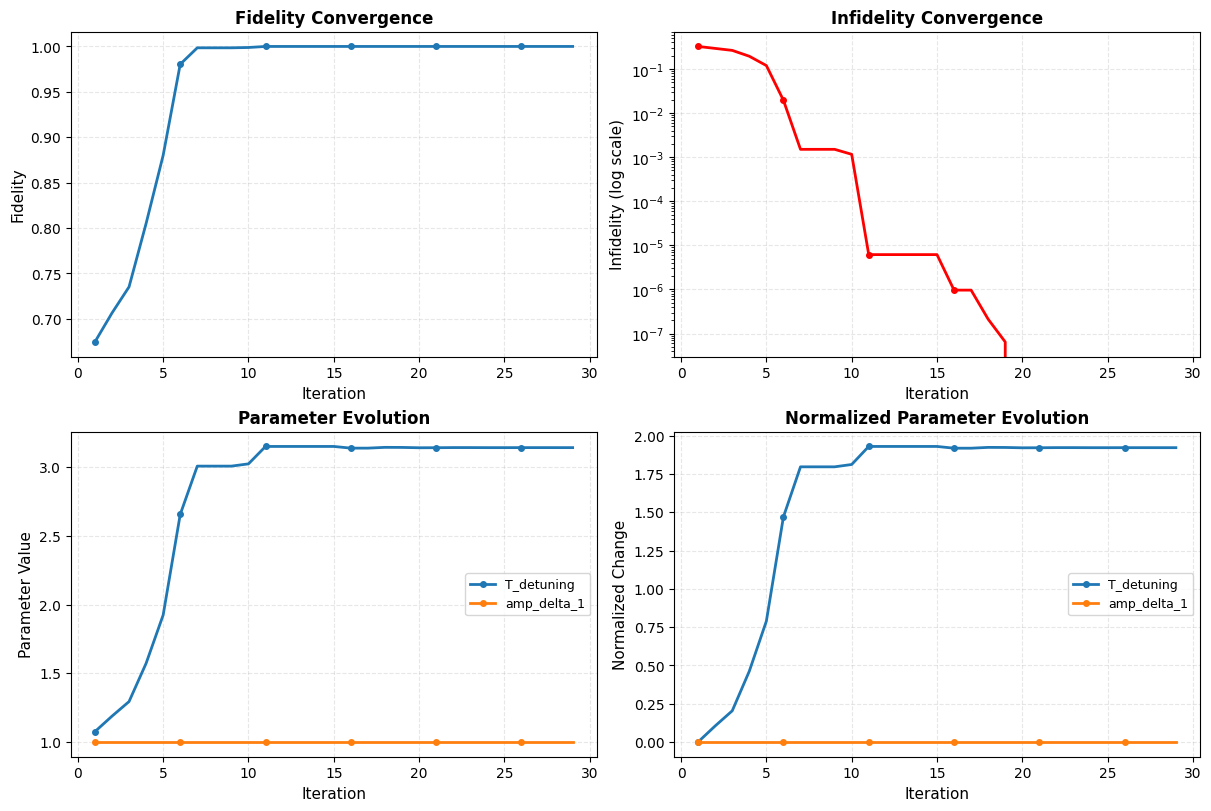

In [6]:
monitor = OptimizationMonitor.load(filepath=save_dir / 'monitor_delta_1_1.00MHz.pkl', objective_func=objective_func)
monitor.plot_convergence()

### Plot Optimized detuning Time $T$ VS amplitude of $\delta_1$

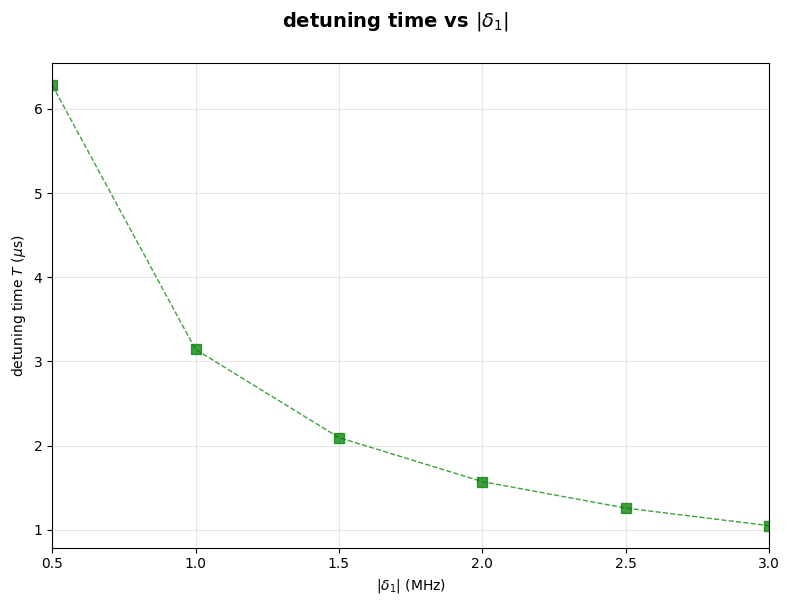

In [17]:
from plotting_helpers import plot_parameter_vs_parameter

fig, ax = plt.subplots(figsize=(8, 6))

# Parameter information: (column_name, ylabel, need_conversion_to_MHz)
param_info = [
    ('T_detuning', r'detuning time $T$ ($\mu$s)', False, ax),
]

for param_name, ylabel, convert_to_MHz, ax in param_info:
    # Convert to appropriate units
    if convert_to_MHz:
        # Convert from rad/μs to MHz
        param_values = df[param_name].values / (2 * np.pi)
    else:
        param_values = df[param_name].values
    
    # Use plot_parameter_vs_parameter function
    plot_parameter_vs_parameter(
        ax=ax,
        x_param_list=df['amp_delta_1'].values,
        y_param_list=[param_values],
        legend_list=[param_name],
        # title=rf'Optimal {param_name} vs $|\delta_1|$',
        xlabel=rf'$|\delta_1|$ (MHz)',
        ylabel=ylabel,
        show_legend=False,
        grid_alpha=0.3
    )

plt.suptitle(r'detuning time vs $|\delta_1|$', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

### Conclusion : 
- From the figure above, we can find that the optimal detuning time $T$ and the given amplitude $\delta_1$ should follow the relation that $T \cdot \delta_1 = \pi$
- my simulation gives the optimal fidelity larger than 1, which is weird. I expect it to be smaller than 1 but very close to 1, such as 0.9999
- As in the X gate case, I don't think there is error channel can affect the fidelity. Here, I think the optimal parameters should give the fidelity exactly equal to 1.